In [2]:
import numpy as np
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import pandas as pd

# Load train and test data

Train data

In [3]:
x_ = np.load("./x_train.npz")
x_train = x_['arr_0']

y_ = np.load("./y_train.npz")
y_train = y_['arr_0']

x_train.shape, y_train.shape

((801, 9), (801,))

load feature names

In [4]:
features_ = np.load("./feature_names.npz")
features = features_['arr_0']
features

array(['SibSp', 'Parch', 'Age_filled', 'Fare_filled', 'Sex_female',
       'Sex_male', 'Pclass_cat_first', 'Pclass_cat_second',
       'Pclass_cat_third'], dtype='<U17')

Validation data

In [5]:
x_ = np.load("./x_val.npz")
x_val = x_['arr_0']

y_ = np.load("./y_val.npz")
y_val = y_['arr_0']
x_val.shape, y_val.shape

((90, 9), (90,))

Test data

In [6]:
x__ = np.load("./x_test.npz")
x_test = x__['arr_0']

x_test.shape

(418, 9)

# Tree Ensamble

In [7]:
n = [100,200,300,400,500]
d = [2,4,10,12,16,None]
s = [2,5,10,15,30,50,100]

params = {'n_estimators':n,
          'max_depth': d,
          'min_samples_split': s}

model = RandomForestClassifier()
search = GridSearchCV(model, params)
search.fit(x_train, y_train)
sorted(search.cv_results_.keys())


KeyboardInterrupt: 

## Best model parameters

In [ ]:
scores_min_samples_split = np.array(search.cv_results_['param_min_samples_split'])
scores_max_depth = np.array(search.cv_results_['param_max_depth'])
scores_n_estimators = np.array(search.cv_results_['param_n_estimators'])
mean_test_score =np.array(search.cv_results_['mean_test_score'])
rank_test_score =np.array(search.cv_results_['rank_test_score'])

index_best_params = np.where(rank_test_score == 1)

print(f"Best mean = {mean_test_score[index_best_params]} in parameters:")
print(f"scores_n_estimators = {scores_n_estimators[index_best_params]}")
print(f"scores_max_depth = {scores_max_depth[index_best_params]}")
print(f"scores_min_samples_split = {scores_min_samples_split[index_best_params]}")

Best mean = [0.84023292] in parameters:
scores_n_estimators = [300]
scores_max_depth = [10]
scores_min_samples_split = [5]


## Plotting parameters selection

NameError: name 'scores_n_estimators' is not defined

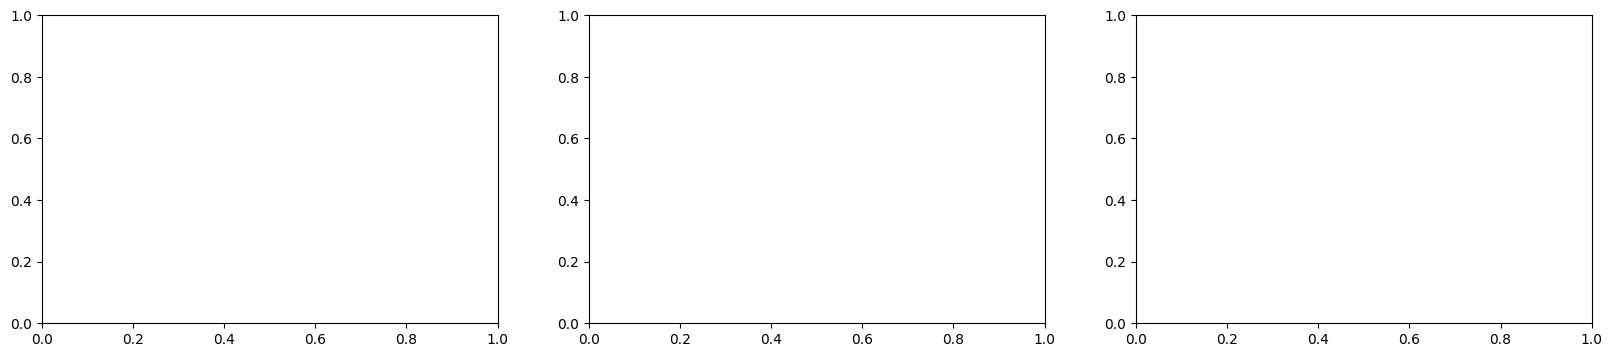

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(20,4))
ax[0].scatter(scores_n_estimators, mean_test_score, s = 5)
ax[0].set_xlabel('tree qty')
ax[0].set_ylabel('accuracy')
ax[1].scatter(scores_max_depth, mean_test_score, s = 5)
ax[1].set_xlabel('max depth')
ax[2].scatter(scores_min_samples_split, mean_test_score, s = 5)
ax[2].set_xlabel('min samples split')

# Prediction

In [84]:
#SibSp	Parch	Age_filled	Fare_filled	Sex_female	Sex_male	Pclass_cat_first	Pclass_cat_second	Pclass_cat_third	Predicted	Target

best_model = RandomForestClassifier(n_estimators=300
                                    , max_depth=None
                                    , min_samples_split=10
                                    #, class_weight={0:1,1:1,2:3,3:4,4:1,5:3,6:3,7:2,8:1}
                                    )
best_model.fit(x_train, y_train)

prediction = best_model.predict(x_train)
train_accuracy = f1_score(y_train, prediction)
print(f"train_accuracy = {train_accuracy}")

prediction = best_model.predict(x_val)
val_accuracy = f1_score(y_val, prediction)
print(f"val_accuracy = {val_accuracy}")

train_accuracy = 0.883248730964467
val_accuracy = 0.7666666666666667


Where prediction didn't work

In [55]:
diffs = pd.DataFrame(x_val[prediction!=y_val]
            , columns=features)
diffs["Predicted"] = prediction[prediction!=y_val]
diffs["Target"] = y_val[prediction!=y_val]

diffs.sort_values(by="Target", ignore_index=True)


,SibSp,Parch,Age_filled,Fare_filled,Sex_female,Sex_male,Pclass_cat_first,Pclass_cat_second,Pclass_cat_third,Predicted,Target
0,0.0,0.0,24.775862,7.7500,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,2.000000,10.4625,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,21.000000,9.8250,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,25.000000,7.7750,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,45.000000,14.4542,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5,0.0,0.0,37.000000,9.5875,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6,1.0,5.0,38.000000,31.3875,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7,1.0,0.0,42.000000,52.5542,0.0,1.0,1.0,0.0,0.0,0.0,1.0
8,0.0,0.0,62.000000,10.5000,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9,3.0,0.0,33.000000,15.8500,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# Output

Model

In [56]:
import pickle

pickle.dump(best_model,open(f"random_forest_valacc_{val_accuracy}.skmodel",'wb'))

Prediction

In [58]:
prediction = best_model.predict(x_test)

metadata = pd.read_csv("./raw_files/test.csv")
metadata = pd.DataFrame(metadata["PassengerId"])

prediction = pd.DataFrame(prediction.astype(int),columns=["Survived"])

result = pd.concat([metadata, prediction], axis=1, ignore_index=True)

In [59]:
result.to_csv("result.csv",sep=",", index=False, header = ["PassengerId", "Survived"])